In [2]:
# Import required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# Import data
df = pd.read_csv('prices.txt', engine='python', sep='   ', header=None, names=[f"stock{i}" for i in range(50)])
df.head()

split = round(0.7 * len(df))
train_df = df.iloc[:split]
test_df = df.iloc[split:]

print(train_df.shape)
print(test_df.shape)

(525, 50)
(225, 50)


### Stats

<Axes: >

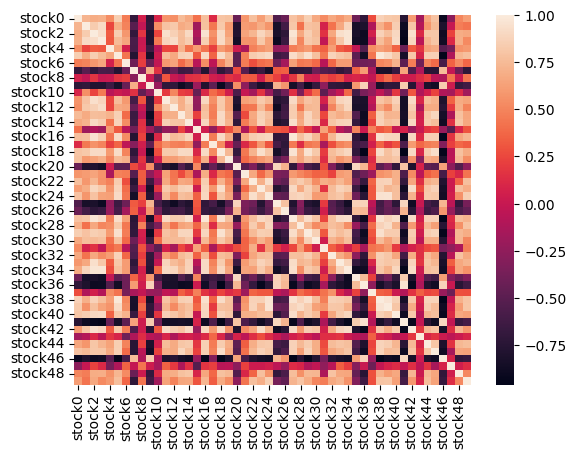

In [3]:
corr_all = df.corr()
corr_train = train_df.corr()
sns.heatmap(corr_all)

<Axes: >

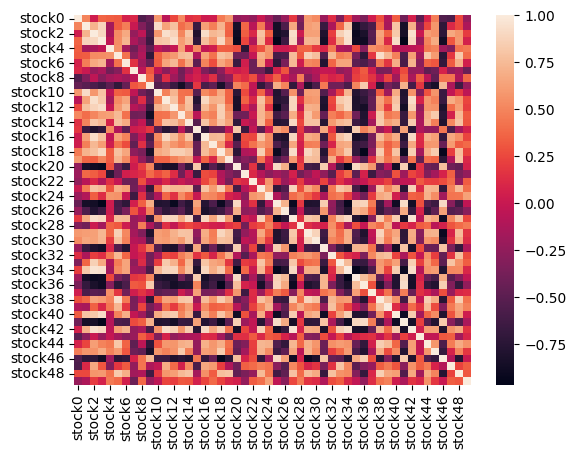

In [4]:
sns.heatmap(corr_train)

### Modelling absolute prices

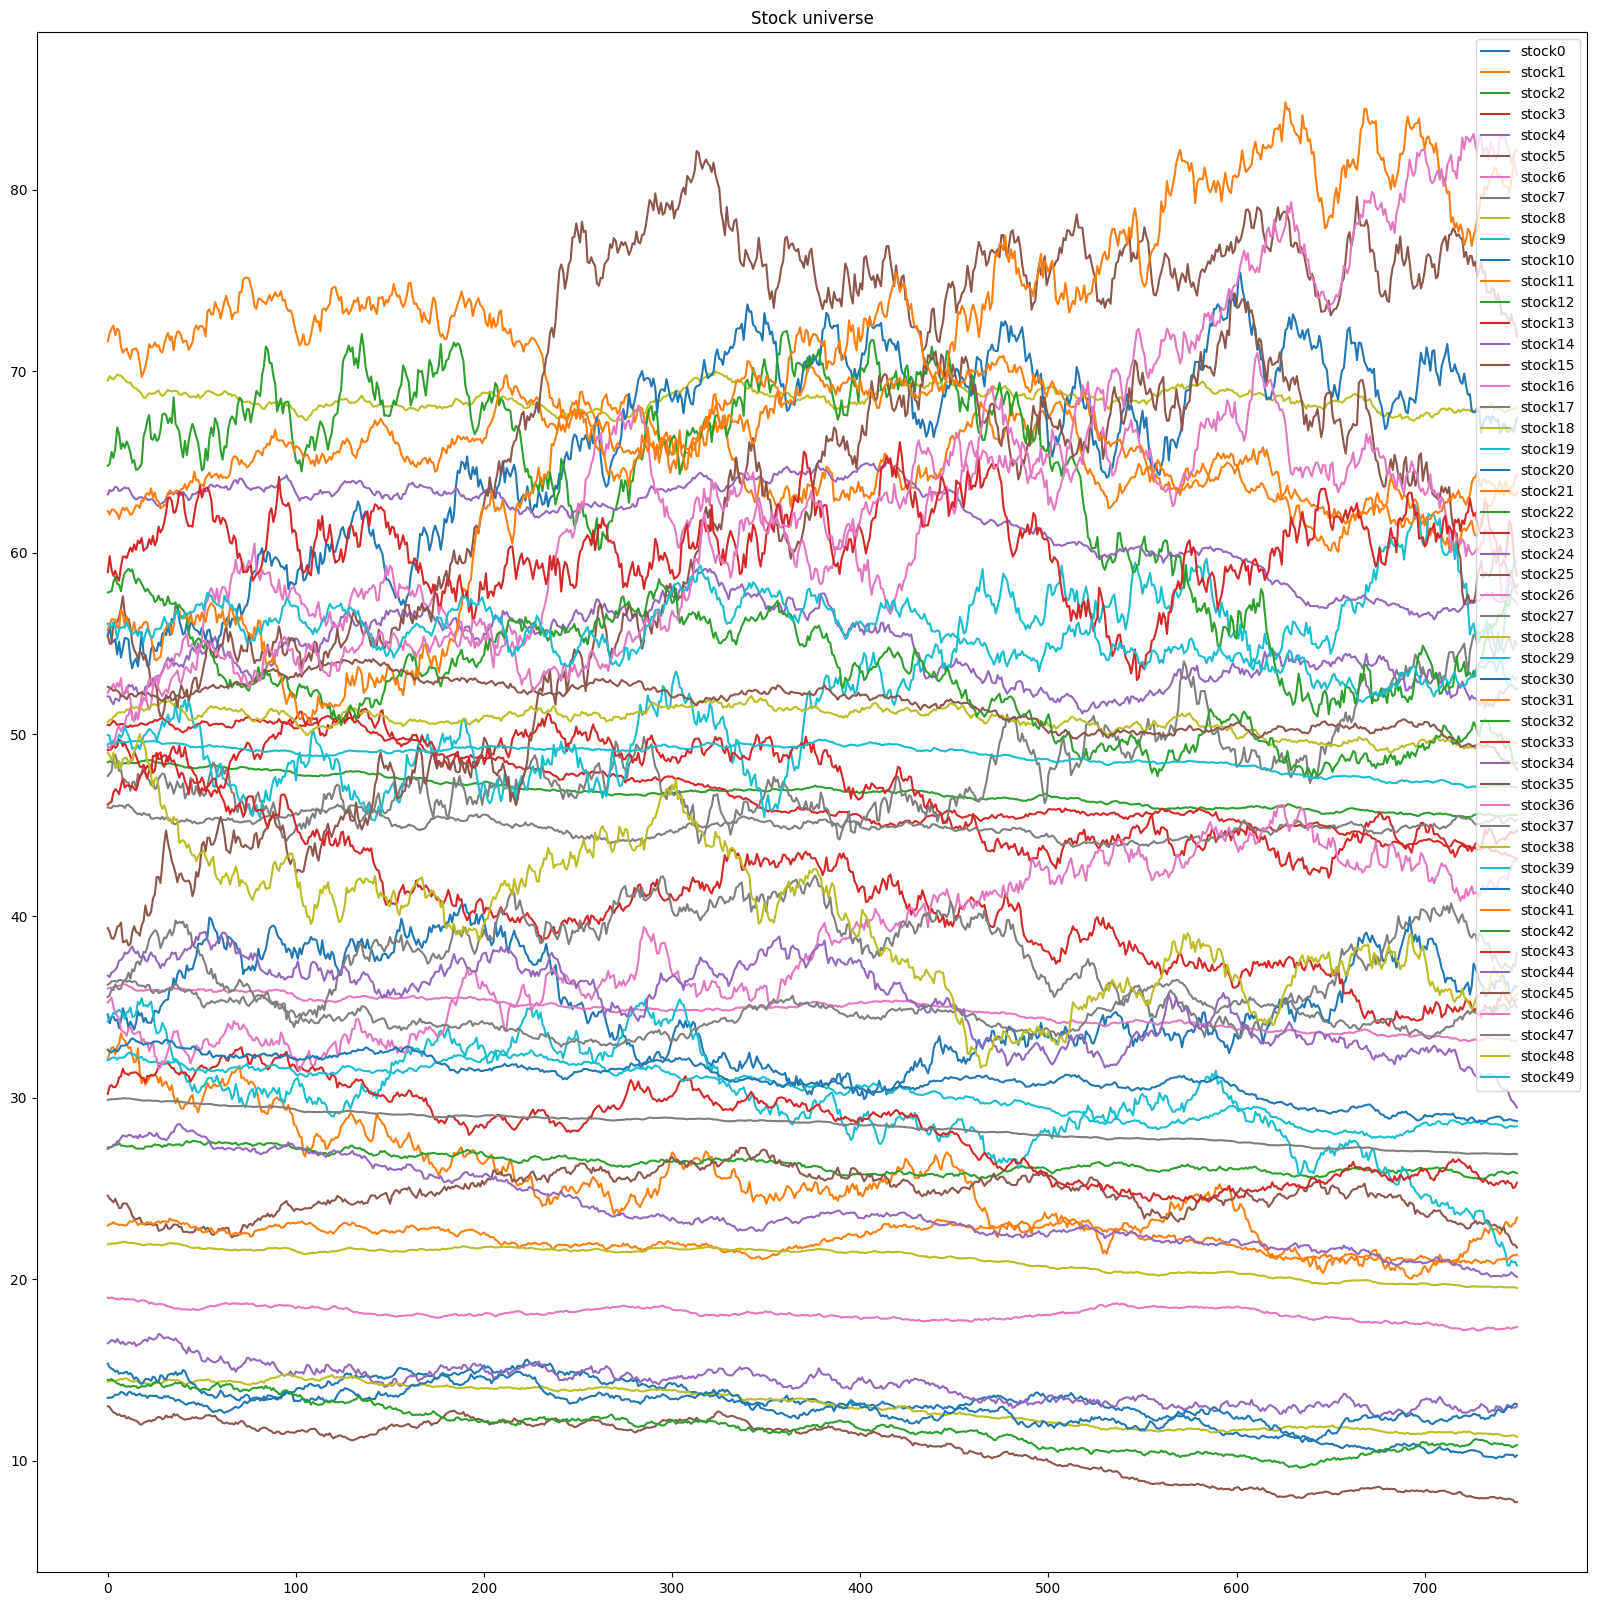

In [5]:
# Plot all stocks
def plot_all_stocks(df_T, figsize=(20,20), title=""):
    plt.figure(num='Universe', figsize=figsize)
    for index, row in df_T.iterrows():
        plt.plot(row, label=index)
    plt.title(label=title)
    plt.legend()
    plt.show()

plot_all_stocks(df.T, title="Stock universe")

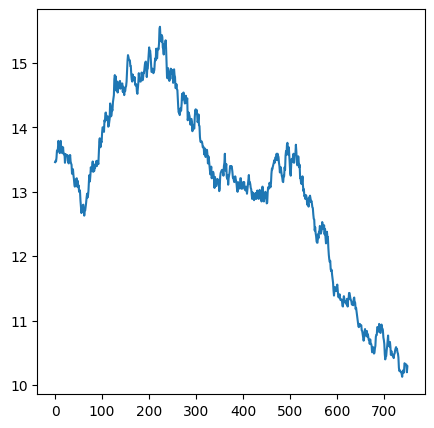

In [6]:
# Plot specific stock
def plot_one_stock(df_T, stock, figsize=(5,5), title=""):
    plt.figure(num=stock, figsize=figsize)
    plt.plot(df_T.loc[stock], label=stock)
    plt.title(label=title)
    plt.show()

plot_one_stock(df.T, 'stock0')

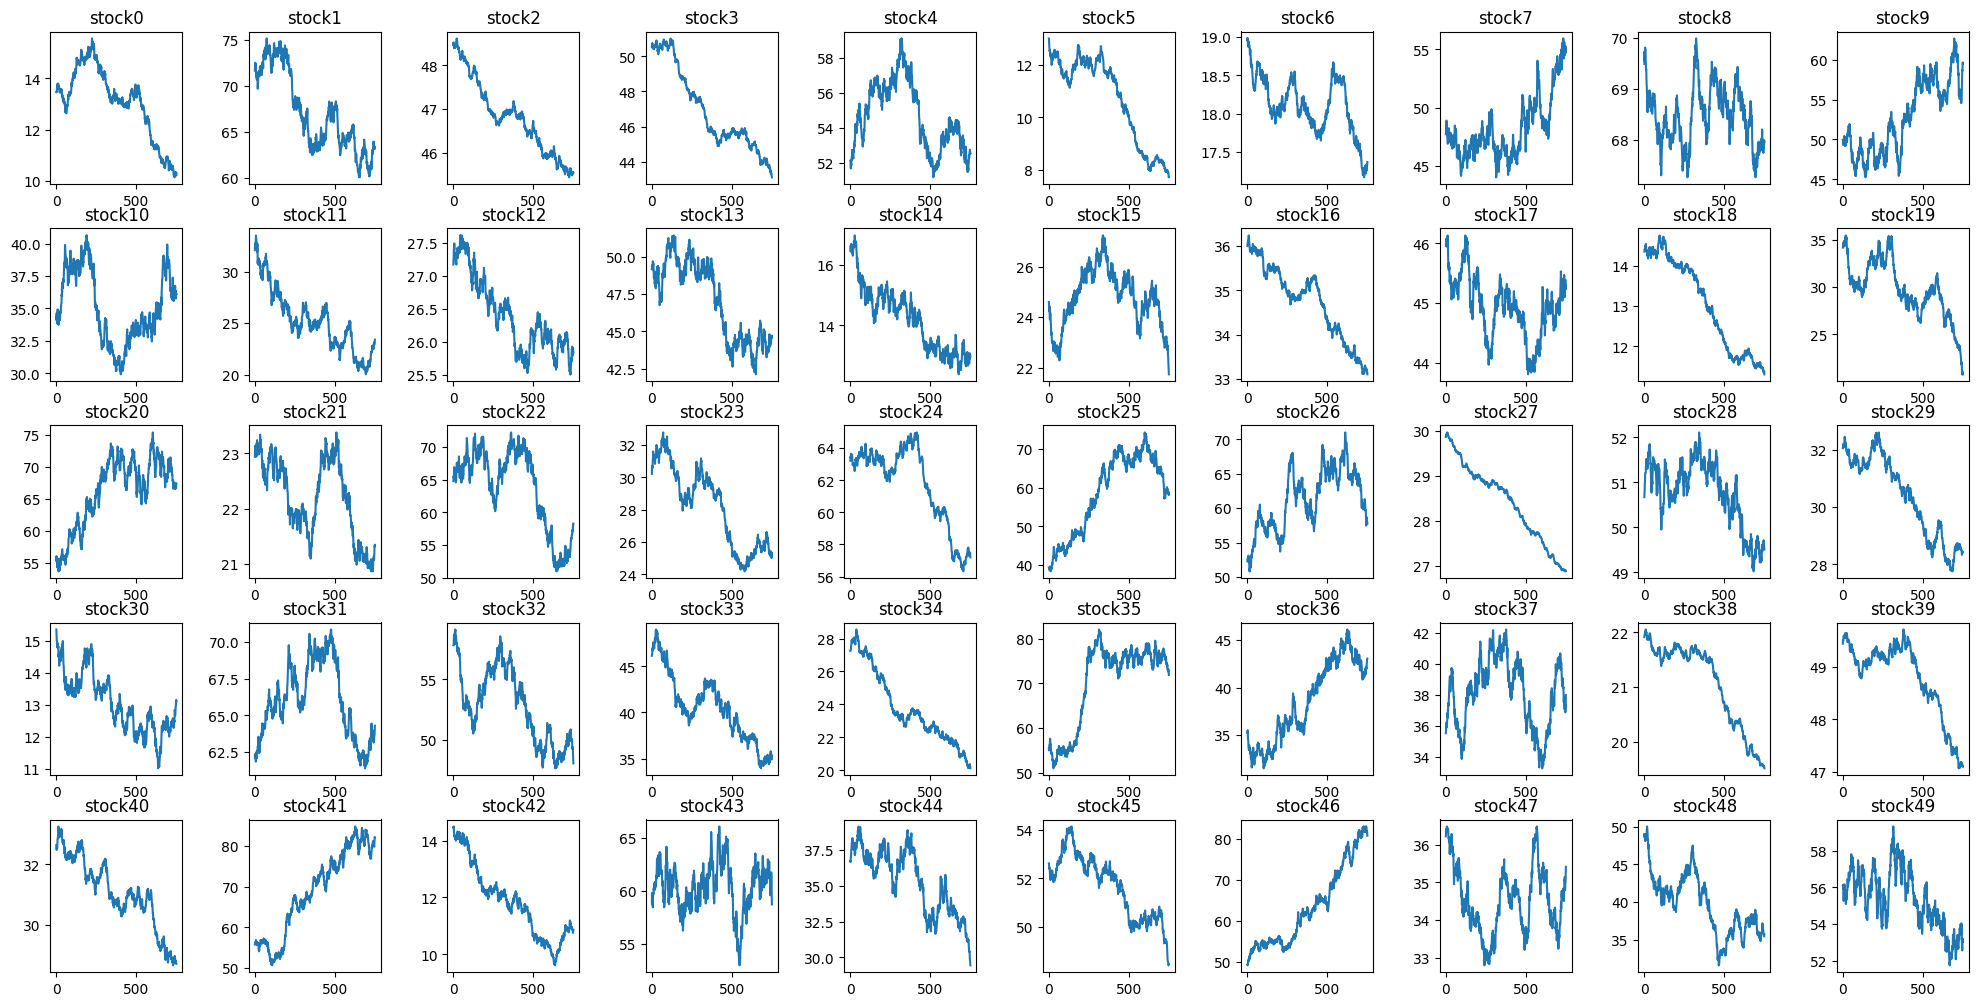

In [6]:
# Plot all stocks individually
def subplot_all_stocks(df_T, rows, cols, figsize=(20,10)):
    fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=figsize)
    fig.tight_layout()

    for i in range(rows):
        for j in range(cols):
            index = (i * cols) + j
            # axs[i, j].plot(df_T.iloc[index].iloc[-100:])
            axs[i, j].plot(df_T.iloc[index])
            axs[i, j].set_title(df_T.iloc[index].name)
    plt.show()

subplot_all_stocks(df.T, 5, 10)

### Modelling % returns

In [8]:
df2 = df.copy()

# Replace with % returns
df2 = df2.pct_change().add_suffix('_log_returns')
df2

stock0_pct_chg  stock1_pct_chg  stock2_pct_chg  stock3_pct_chg  \
0               NaN             NaN             NaN             NaN   
1          0.001486        0.006281        0.001238       -0.000396   
2         -0.000742        0.003467       -0.000824        0.002376   
3          0.004454        0.002211       -0.001238        0.002568   
4          0.008130       -0.007171       -0.000413       -0.001970   
..              ...             ...             ...             ...   
745       -0.000968       -0.005031       -0.000439        0.000462   
746        0.000000        0.000948        0.000439       -0.001615   
747        0.000000       -0.001737       -0.000219       -0.000693   
748       -0.011628       -0.001740        0.000220       -0.001387   
749        0.008824        0.003169       -0.000219       -0.001621   

     stock4_pct_chg  stock5_pct_chg  stock6_pct_chg  stock7_pct_chg  \
0               NaN             NaN             NaN             NaN   
1         -0.000768       -0.003846       -0.001581        0.002725   
2         -0.004994       -0.012355        0.001583        0.002926   
3         -0.002703       -0.010164       -0.001054        0.015840   
4          0.006001       -0.003160       -0.003692        0.002872   
..              ...             ...             ...             ...   
745        0.001141        0.001266       -0.002307        0.001993   
746        0.001710       -0.005057       -0.002312       -0.006872   
747       -0.001328       -0.005083        0.003476       -0.004552   
748       -0.002848       -0.015326        0.000577        0.009329   
749        0.000190        0.001297        0.002308       -0.003806   

     stock8_pct_chg  stock9_pct_chg  ...  stock40_pct_chg  stock41_pct_chg  \
0               NaN             NaN  ...              NaN              NaN   
1          0.003454       -0.000600  ...        -0.003676         0.003766   
2         -0.001864       -0.012017  ...        -0.001230         0.006611   
3         -0.000862        0.006892  ...         0.003387        -0.000355   
4          0.002013       -0.004228  ...         0.001534         0.000000   
..              ...             ...  ...              ...              ...   
745       -0.000589        0.021747  ...         0.001739        -0.004616   
746        0.001769       -0.001873  ...        -0.001041         0.008523   
747       -0.000147        0.009041  ...        -0.001737         0.008576   
748        0.000736        0.008284  ...         0.000000         0.013185   
749       -0.000588       -0.002683  ...        -0.001044        -0.001095   

     stock42_pct_chg  stock43_pct_chg  stock44_pct_chg  stock45_pct_chg  \
0                NaN              NaN              NaN              NaN   
1          -0.001383         0.014761        -0.001907        -0.000760   
2           0.004155        -0.012874         0.006823        -0.001712   
3          -0.006897        -0.005251         0.001355        -0.001715   
4          -0.002778         0.004768         0.002436         0.000763   
..               ...              ...              ...              ...   
745        -0.000921         0.016458        -0.009862        -0.000412   
746        -0.007373        -0.004372        -0.008964        -0.002268   
747        -0.001857        -0.018377        -0.002680         0.000207   
748         0.005581        -0.018555        -0.005375         0.000207   
749         0.004625        -0.008609        -0.005404         0.000413   

     stock46_pct_chg  stock47_pct_chg  stock48_pct_chg  stock49_pct_chg  
0                NaN              NaN              NaN              NaN  
1          -0.002635         0.001380        -0.003265        -0.000178  
2           0.005691         0.003309        -0.005733        -0.003210  
3          -0.001213         0.000550         0.009061         0.004293  
4           0.007487         0.000275        -0.017551        -0.004275  
..               

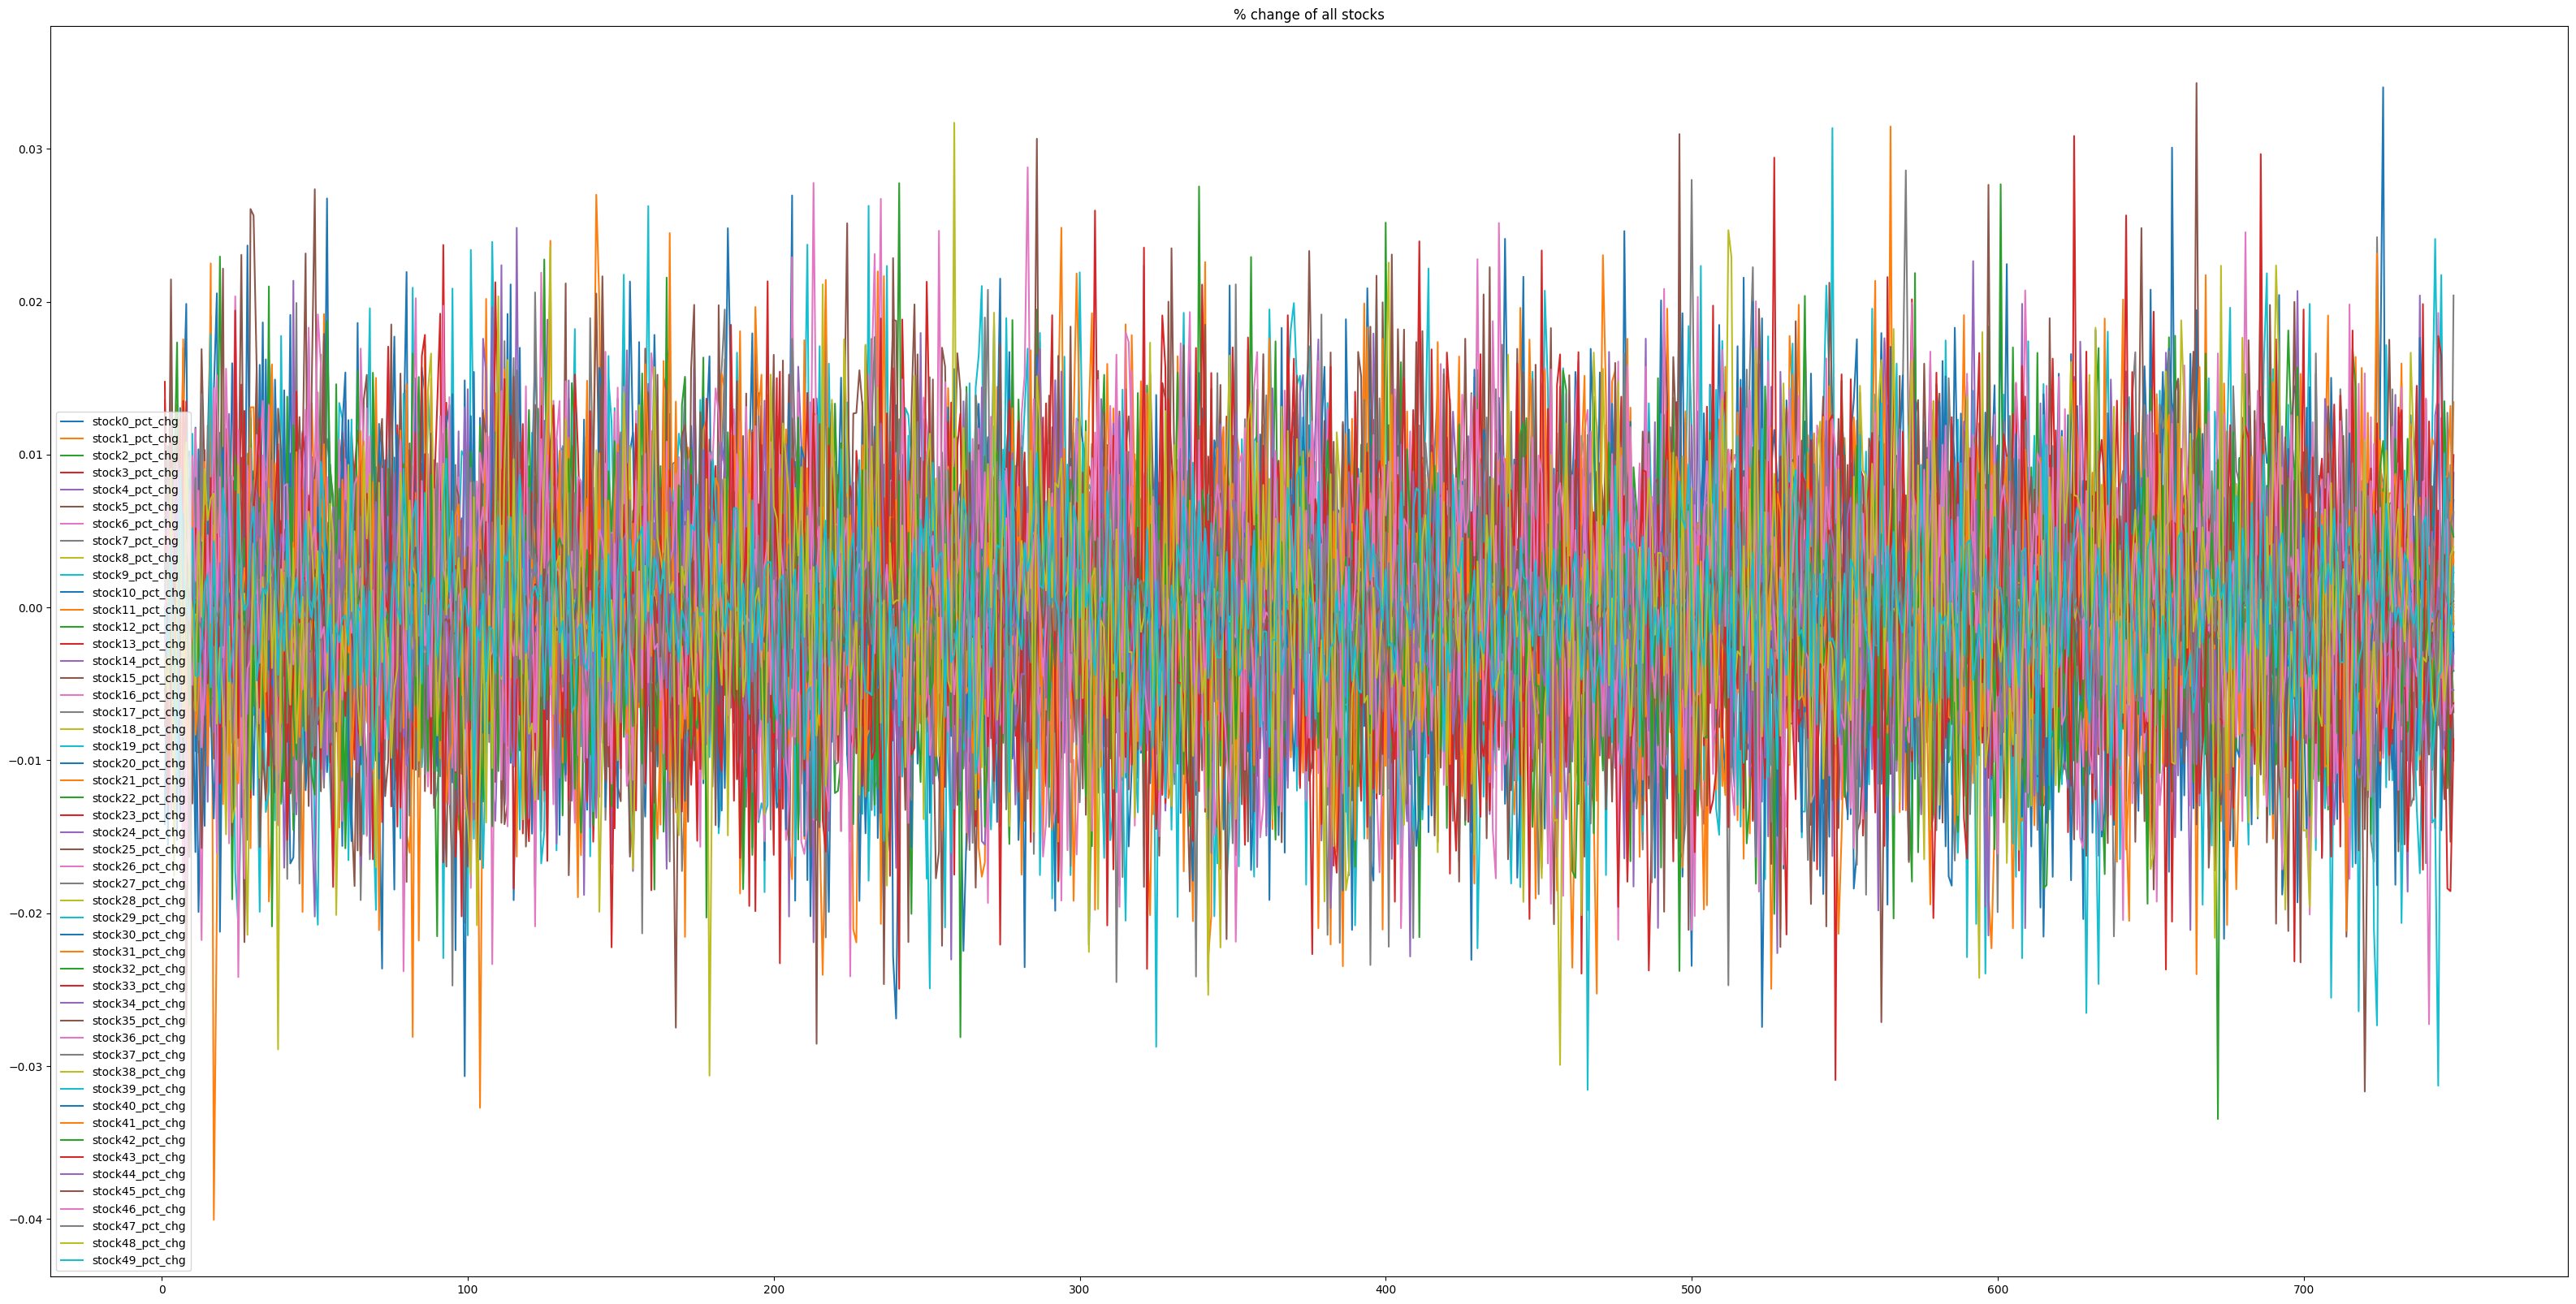

In [9]:
plot_all_stocks(df2.T, figsize=(40,20), title="% change of all stocks")

### Modelling Log returns

<Axes: >

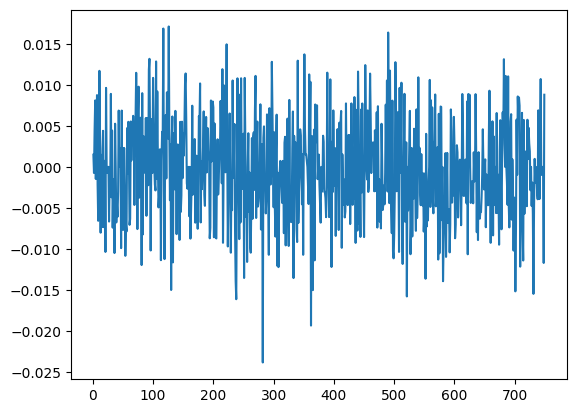

In [18]:
df3 = df.copy()

df3 = np.log1p(df3.pct_change()).dropna()
df3['stock0'].plot()